In [78]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Loading the data
dataset=pd.read_csv(r"C:\CASE STUDY\Portfolio\Airbnb Price Prediction\Datasource\listings_sg.csv")

### Exploratory Data Analysis

In [80]:
#to get the column names
dataset.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [81]:
# project objective is to create the model for price prediction. Firstly, we will remove the redundant variables which wouldn't effect price.
dataset = dataset.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name','id','host_id','host_total_listings_count','neighbourhood_group_cleansed',
       'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_response_time', 
       'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
        'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','bathrooms',
        'amenities', 
        'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','review_scores_rating'],axis=1)
dataset.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,Tampines,1.34537,103.95887,Private room in villa,Private room,3,1 private bath,2.0,NaN,NaN,92,365,19
1,Tampines,1.34754,103.95958,Private room in home,Private room,1,Shared half-bath,1.0,1.0,$80.00,92,365,24
2,Tampines,1.34531,103.96100,Private room in home,Private room,2,Shared half-bath,1.0,2.0,$80.00,92,365,46
3,Bukit Merah,1.29015,103.80814,Private room in rental unit,Private room,1,2 shared baths,1.0,1.0,$50.00,180,999,20
4,Bukit Merah,1.28836,103.81144,Private room in rental unit,Private room,1,2.5 shared baths,1.0,1.0,$50.00,180,999,16


In [82]:
#to know the dimensions of dataset
dataset.shape

(3540, 13)

In [83]:
#missing values
dataset.isnull().sum()

neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms_text             16
bedrooms                  257
beds                      817
price                     781
minimum_nights              0
maximum_nights              0
number_of_reviews           0
dtype: int64

In [84]:
#781 records are missing in price which is about 22% of total records (3,540).
# I will not impute the price because we are predicting the price and the price must be accurate. 
# So I will remove those missing records and will based on the records which has price data.
dataset = dataset.dropna()
dataset.isnull().sum()

neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
dtype: int64

In [85]:
dataset.shape

(2705, 13)

In [86]:
#to know the datatype
dataset.dtypes

neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                      object
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
dtype: object

In [87]:
#to covert data type of price variable. It should be numerical variable
dataset['price'] = dataset['price'].str.replace('$',"")
dataset['price'] = dataset['price'].str.replace(',',"")
dataset['price'] = dataset['price'].astype('float')
dataset.dtypes

neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
dtype: object

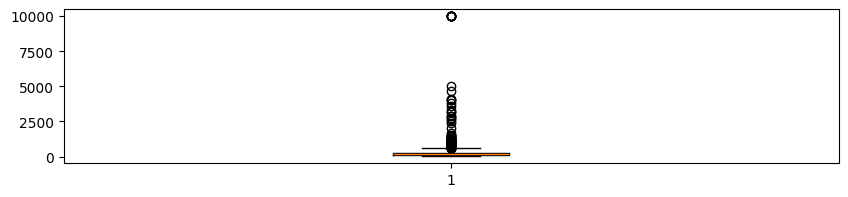

In [88]:
#plotting price in box plot to find if there is any outlier
plt.boxplot(dataset['price'])
plt.show()

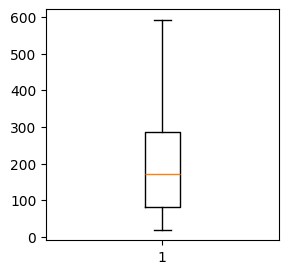

In [89]:
#Outliers disproportionately affect the calculation of regression coefficients, skewing the slope and intercept of the line. 
#Outliers lead to larger residuals, indicating poor model fit and impacting the accuracy of predictions for the majority of the data.
#So I will fix the outliers by replacing with upper bound price
Q1_price = dataset['price'].quantile(0.25)
Q3_price = dataset['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
UpperB_price = Q3_price + IQR_price * 1.5
dataset.loc[dataset['price'] > UpperB_price, 'price'] = UpperB_price
plt.figure(figsize=(3,3))
plt.boxplot(dataset['price'])
plt.show()

In [90]:
#removing non numerical characters from the bathroom_text variable
dataset['bathrooms'] = dataset['bathrooms_text'].str.replace('[^.,0-9]',"",regex=True)
dataset['bathrooms'] = pd.to_numeric(dataset['bathrooms'])
dataset['bathrooms'] = dataset['bathrooms'].fillna(1)

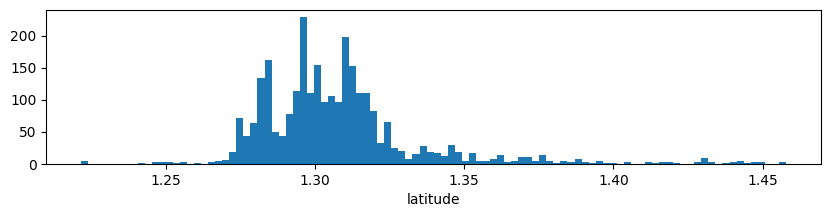

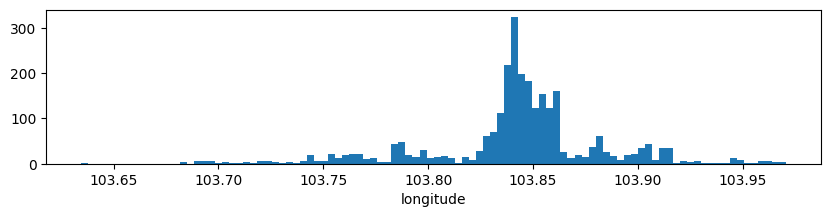

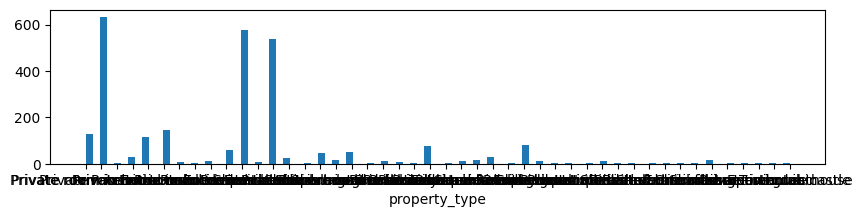

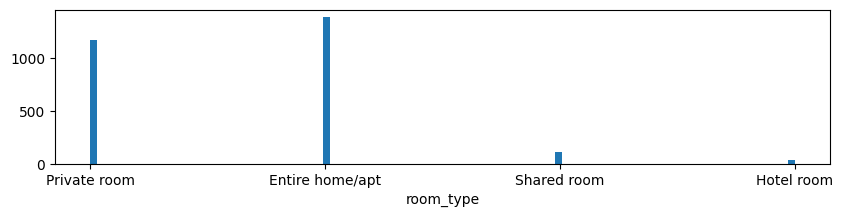

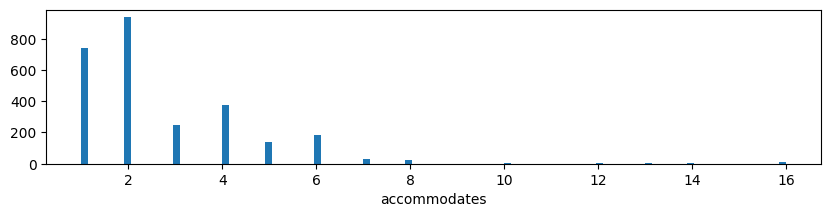

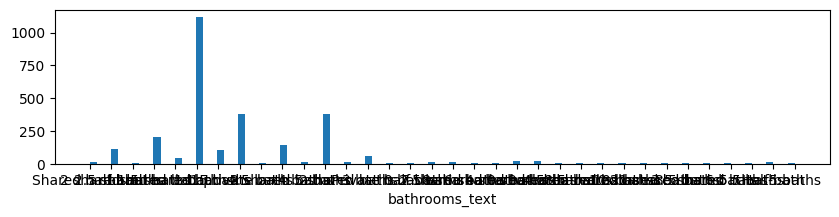

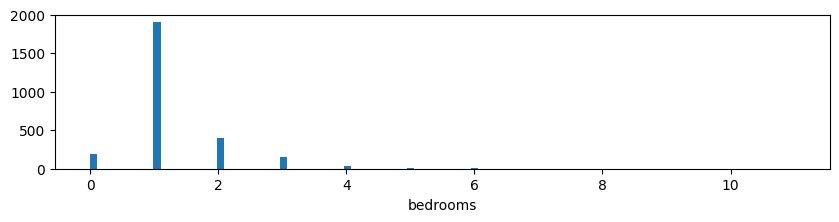

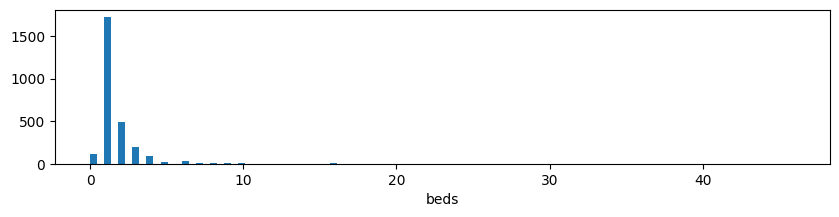

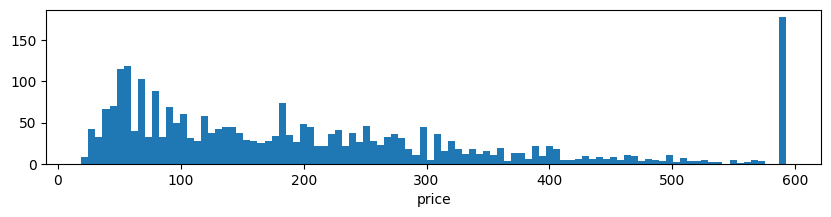

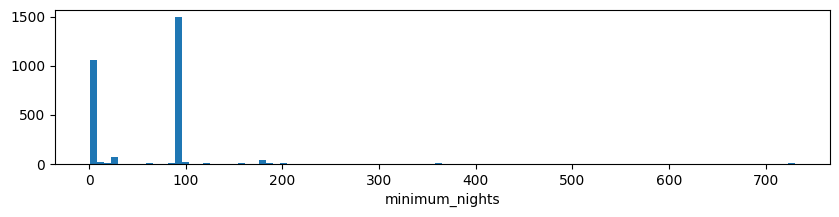

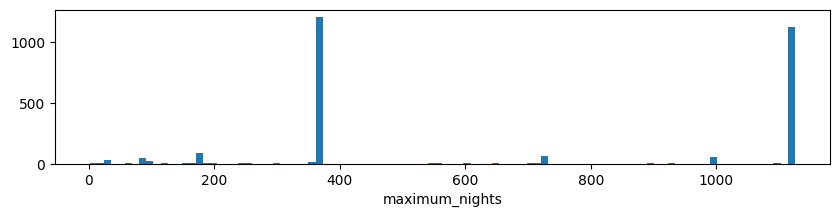

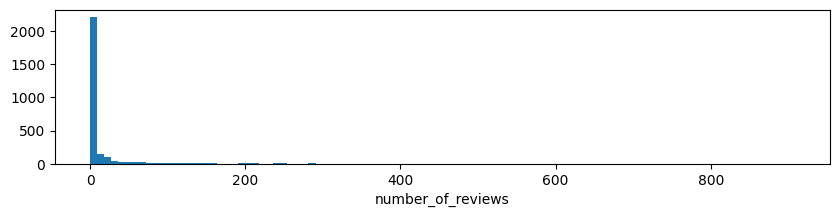

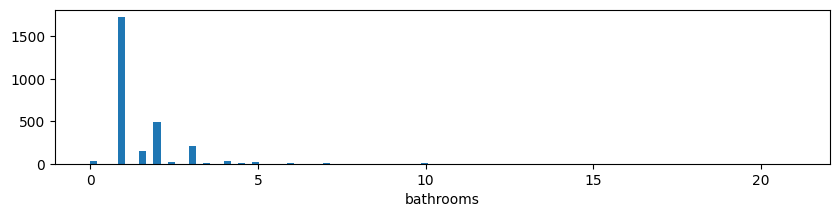

In [91]:
#to see the distribution of each variables
no_of_columns = len(dataset.columns)
plt.rcParams["figure.figsize"] = [10,2]  #set the graph to a smaller size 
for i in range(1,no_of_columns) :
    col_name = dataset.columns[i]  # get the column name to identify the graph
    x=dataset[col_name]
    plt.xlabel(col_name)         # The column name will be the x-label ( just to identify )
    k=plt.hist(x,bins=100)       # Change the right number of bins to get it more/less granular 
    plt.show()

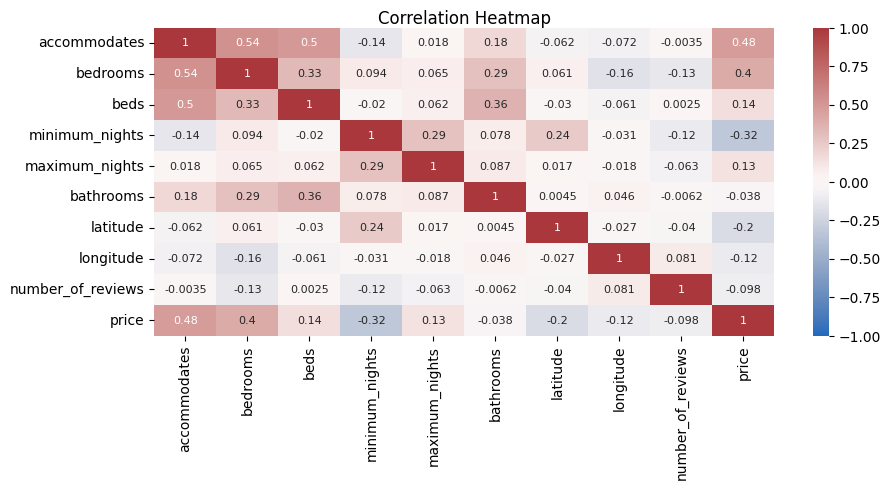

In [92]:
#to check strength and direction of correlation between numerical variables
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(dataset[['accommodates','bedrooms','beds','minimum_nights','maximum_nights','bathrooms','latitude','longitude','number_of_reviews','price']].corr(), vmin=-1, vmax=1, annot=True,annot_kws={"size": 8}, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1);
plt.show()

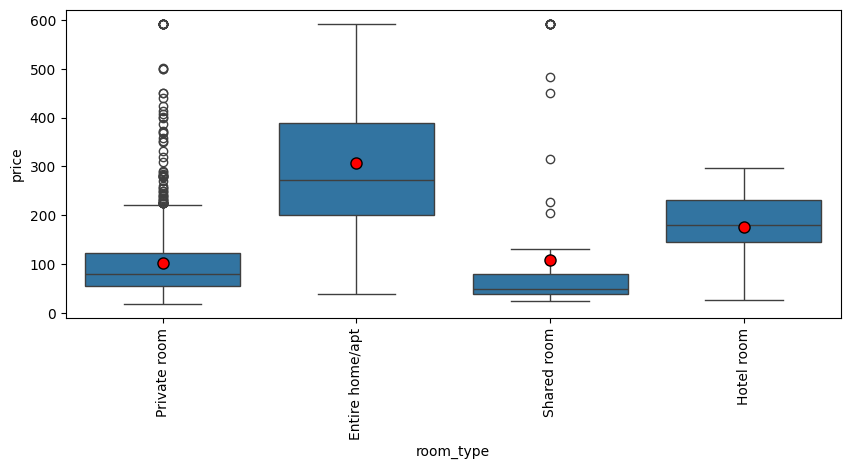

In [93]:
#the mean price of each room type to check if there is variation among the room type
plt.figure(figsize = (10,4))
sns.boxplot(data=dataset,x='room_type',y='price',showmeans = True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':'8'}) 
plt.tick_params(axis='x', rotation=90)
plt.show()

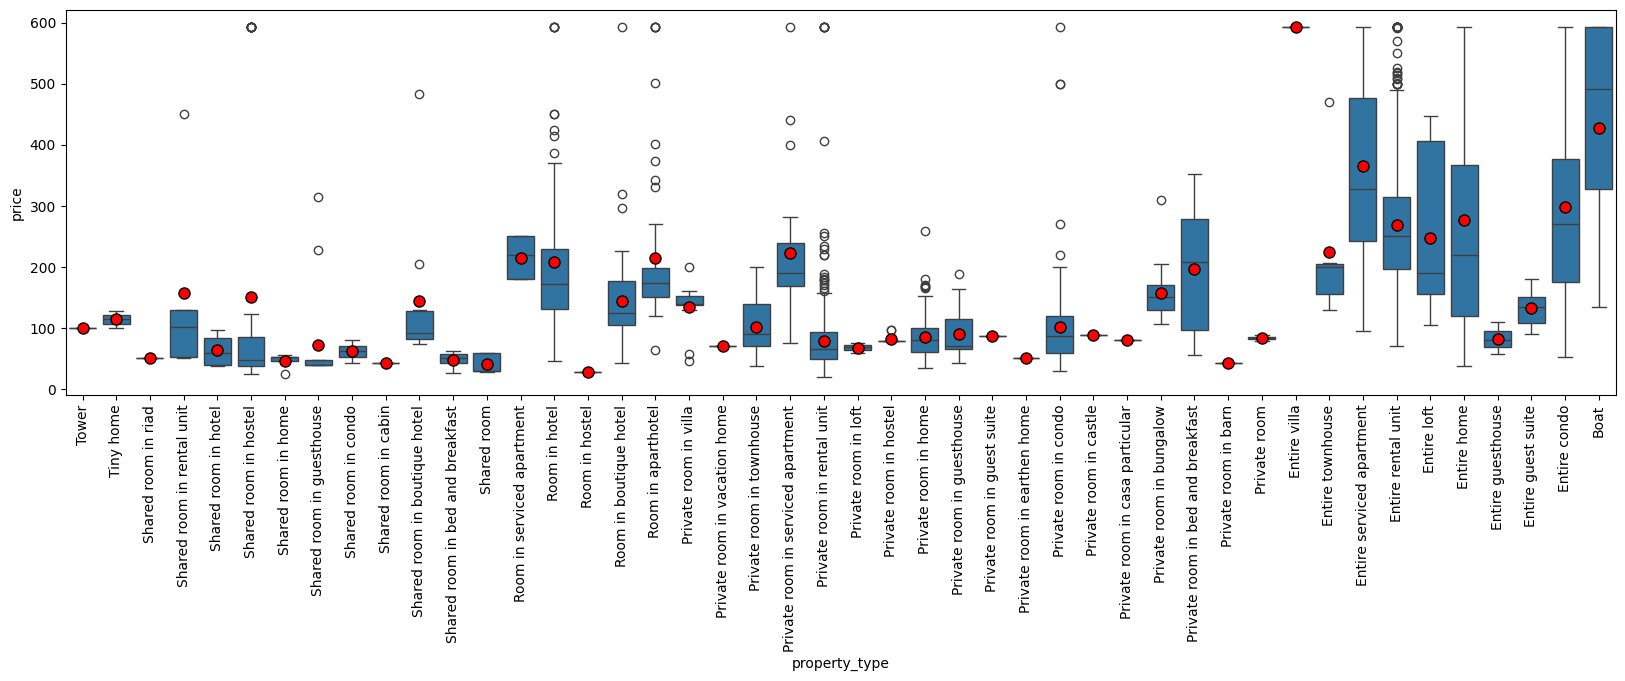

In [94]:
#the mean price of each property type to check if there is variation among the property type
plt.figure(figsize = (20,5))
# Find the order
my_order = dataset.groupby(by=["property_type"])["price"].mean().iloc[::-1].index
sns.boxplot(data=dataset,x='property_type',y='price',showmeans = True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':'8'},order=my_order) 
plt.tick_params(axis='x', rotation=90)
plt.show()

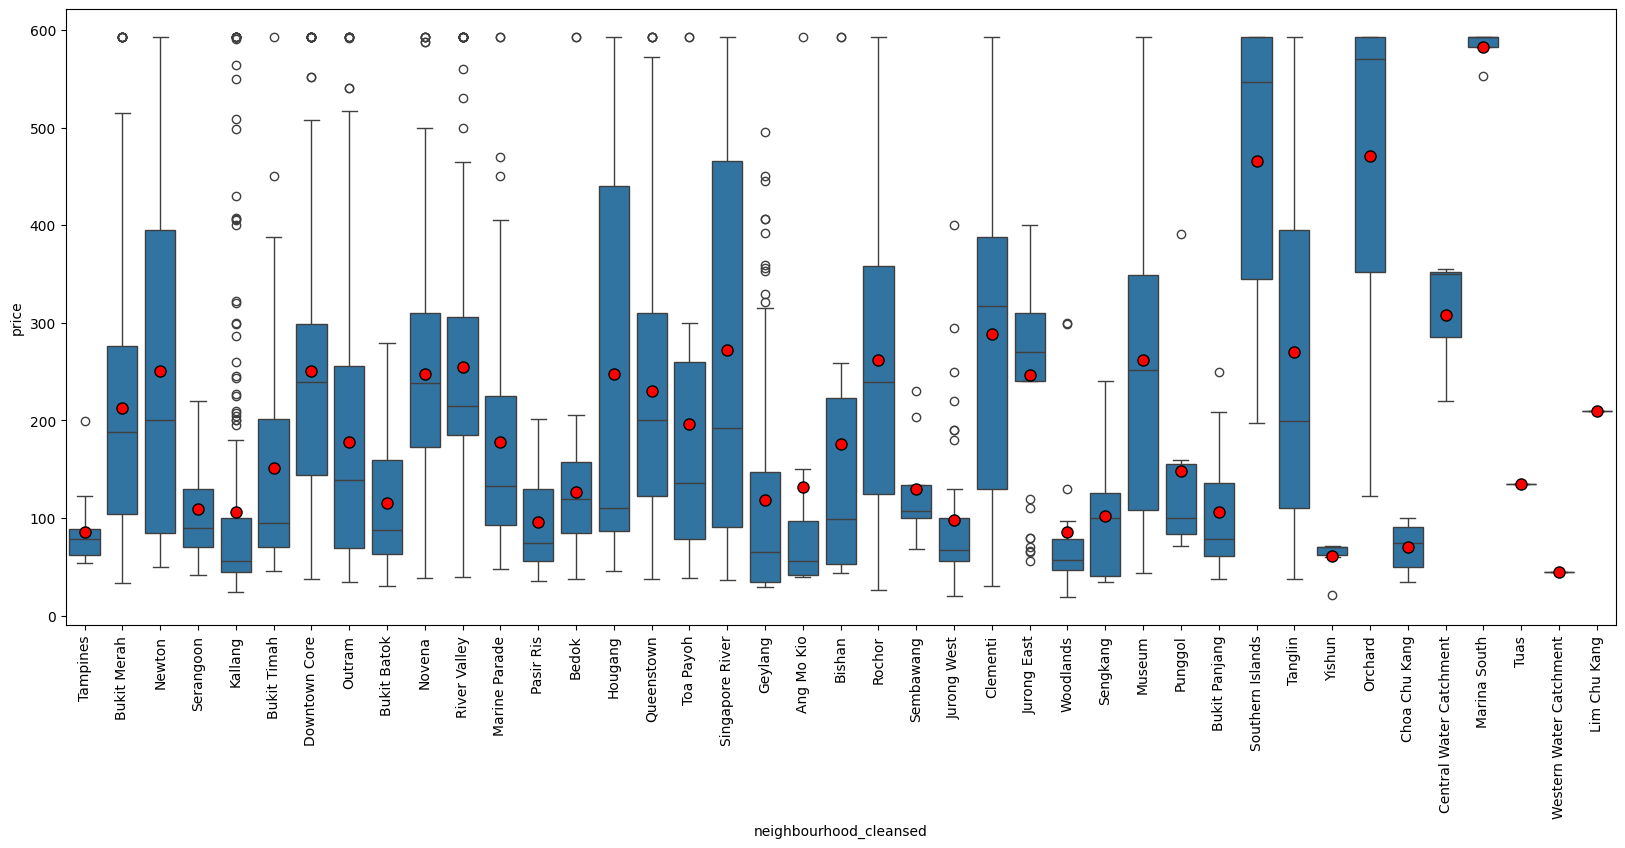

In [95]:
#the mean price of each neighbourhood to check if there is variation among the neighbourhood
plt.figure(figsize = (20,8))
sns.boxplot(data=dataset,x='neighbourhood_cleansed',y='price',showmeans = True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':'8'}) 
plt.tick_params(axis='x', rotation=90)
plt.show()

### Data Preprocessing

In [96]:
#additional variable if the bathroom is shared or private. It can have price variation based on shared or private bathroom.
dataset['bathroom_type'] = dataset['bathrooms_text'].apply(lambda x:1 if 'shared' in x else 2)
dataset = dataset.drop(columns='bathrooms_text')

In [97]:
#additional variable of short or long stay. It can have price variation based on stay.
dataset['short_long_stay'] = dataset['minimum_nights'].apply(lambda x:2 if x>90 else 1)

In [98]:
dataset.groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
Ang Mo Kio                 132.312500
Bedok                      126.654206
Bishan                     175.857143
Bukit Batok                115.107143
Bukit Merah                212.927152
Bukit Panjang              106.272727
Bukit Timah                151.662500
Central Water Catchment    308.333333
Choa Chu Kang               70.142857
Clementi                   288.964286
Downtown Core              250.333333
Geylang                    118.236641
Hougang                    247.625000
Jurong East                246.484848
Jurong West                 97.595238
Kallang                    105.967241
Lim Chu Kang               210.000000
Marina South               582.625000
Marine Parade              177.706522
Museum                     261.791667
Newton                     250.397260
Novena                     247.371257
Orchard                    470.841667
Outram                     178.006550
Pasir Ris                   96.111111
Punggol                    

In [99]:
dataset.groupby('property_type')['price'].mean()

property_type
Boat                                  427.750000
Entire condo                          297.819444
Entire guest suite                    132.400000
Entire guesthouse                      82.000000
Entire home                           276.595745
Entire loft                           247.333333
Entire rental unit                    268.862457
Entire serviced apartment             365.830855
Entire townhouse                      224.333333
Entire villa                          592.500000
Private room                           83.500000
Private room in barn                   43.000000
Private room in bed and breakfast     196.916667
Private room in bungalow              156.961538
Private room in casa particular        80.000000
Private room in castle                 88.000000
Private room in condo                 102.306034
Private room in earthen home           50.000000
Private room in guest suite            86.000000
Private room in guesthouse             90.764706
Privat

In [100]:
# ordinal encoding for room type because the mean price exhibits ranking among the room types   
dataset['room_type'] = dataset['room_type'].replace("Shared room", "1")
dataset['room_type'] = dataset['room_type'].replace('Private room', "2")
dataset['room_type'] = dataset['room_type'].replace('Entire home/apt', "4")
dataset['room_type'] = dataset['room_type'].replace('Hotel room', "3")
dataset["room_type"] = dataset["room_type"].astype("int")

In [101]:
# ordinal encoding for neighbourhood because the mean price exhibits ranking among the neighbourhood    
dataset['neighbourhood_cleansed'] = dataset['neighbourhood_cleansed'].replace(dict.fromkeys(['Jurong West','Pasir Ris','Tampines','Woodlands','Choa Chu Kang','Yishun','Western Water Catchment'], 1), 
    regex=True)
dataset['neighbourhood_cleansed'] = dataset['neighbourhood_cleansed'].replace(dict.fromkeys(['Toa Payoh','Outram','Marine Parade','Bishan','Bukit Timah','Punggol','Tuas','Ang Mo Kio','Sembawang','Bedok','Geylang','Bukit Batok','Serangoon','Bukit Panjang','Kallang','Sengkang'], 2), 
    regex=True)
dataset['neighbourhood_cleansed'] = dataset['neighbourhood_cleansed'].replace(dict.fromkeys(['Clementi','Tanglin','Singapore River','Museum','River Valley','Rochor','Hougang','Novena','Newton','Jurong East','Downtown Core','Queenstown','Bukit Merah','Lim Chu Kang'],3), 
    regex=True)
dataset['neighbourhood_cleansed'] = dataset['neighbourhood_cleansed'].replace(dict.fromkeys(['Marina South','Southern Islands','Orchard','Central Water Catchment'], 4), 
    regex=True)
dataset["neighbourhood_cleansed"] = dataset["neighbourhood_cleansed"].astype("int")

C:\Users\User\AppData\Local\Temp\ipykernel_22432\2539145276.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['neighbourhood_cleansed'] = dataset['neighbourhood_cleansed'].replace(dict.fromkeys(['Marina South','Southern Islands','Orchard','Central Water Catchment'], 4),


In [102]:
# ordinal encoding for property type because the mean price exhibits ranking among the property type       
dataset['property_type'] = dataset['property_type'].replace(dict.fromkeys(['Private room in guesthouse','Private room in castle','Private room in guest suite','Private room in home','Private room in hostel','Entire guesthouse','Private room in casa particular','Private room in rental unit','Shared room in guesthouse','Private room in vacation home','Private room in loft','Shared room in hotel','Shared room in condo','Private room in earthen home','Shared room in riad','Shared room in bed and breakfast','Shared room in home','Shared room in cabin','Private room in barn','Shared room','Room in hostel'], 1), 
    regex=True)
dataset['property_type'] = dataset['property_type'].replace(dict.fromkeys(['Private room in bed and breakfast','Private room in bungalow','Private room','Shared room in hostel','Room in boutique hotel','Shared room in boutique hotel','Private room in villa','Entire guest suite','Tiny home','Shared room in rental unit','Private room in condo','Private room in townhouse','Tower'], 2), 
    regex=True)
dataset['property_type'] = dataset['property_type'].replace(dict.fromkeys(['Entire villa','Boat','Entire serviced apartment','Entire condo','Entire home','Entire rental unit','Entire loft','Room in hotel','Entire townhouse','Private room in serviced apartment','Room in aparthotel','Room in serviced apartment'],3), 
    regex=True)
dataset["property_type"] = dataset["property_type"].astype("int")

C:\Users\User\AppData\Local\Temp\ipykernel_22432\2335203053.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['property_type'] = dataset['property_type'].replace(dict.fromkeys(['Entire villa','Boat','Entire serviced apartment','Entire condo','Entire home','Entire rental unit','Entire loft','Room in hotel','Entire townhouse','Private room in serviced apartment','Room in aparthotel','Room in serviced apartment'],3),


In [103]:
dataset.dtypes

neighbourhood_cleansed      int64
latitude                  float64
longitude                 float64
property_type               int64
room_type                   int64
accommodates                int64
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
maximum_nights              int64
number_of_reviews           int64
bathrooms                 float64
bathroom_type               int64
short_long_stay             int64
dtype: object

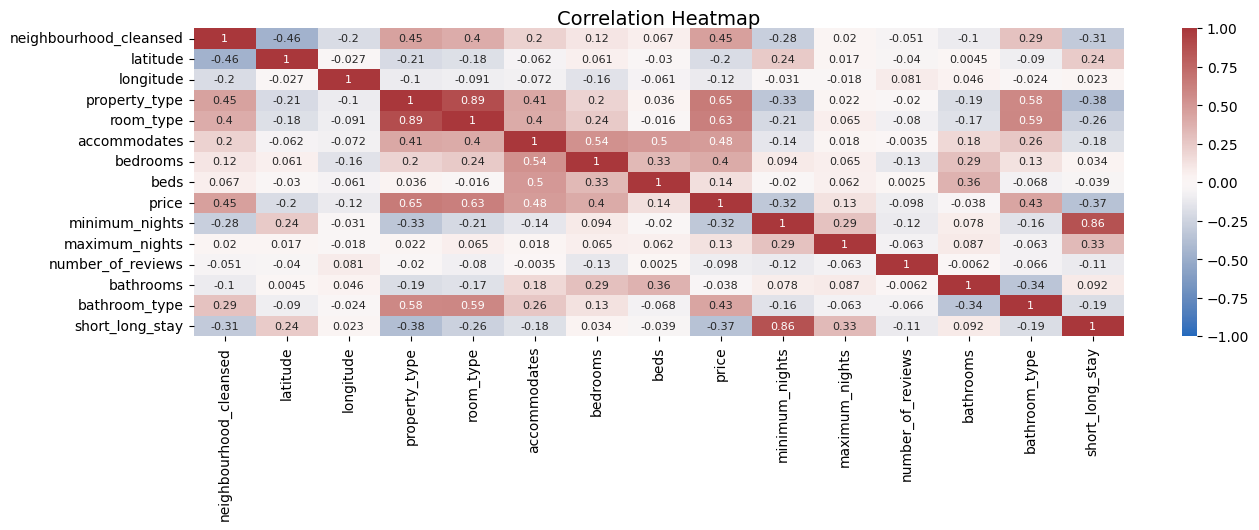

In [104]:
#correlations with all variables
plt.figure(figsize=(15, 4))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True,annot_kws={"size": 8}, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=1);
plt.show()

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#I will drop the variables which has weak correlation with price
#specify X and y variables
X = dataset.drop(columns=['price','latitude','longitude','maximum_nights','minimum_nights','number_of_reviews','beds'],axis=1)
y = dataset['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2164, 8) (541, 8) (2164,) (541,)


In [148]:
#create and fit the model
lin = LinearRegression()
lin.fit(X_train,y_train)


LinearRegression()

In [149]:
#to evaluate the quality of regression model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = lin.predict(X_test)

mse = np.round(mean_squared_error(y_test, y_pred),3)
rmse = np.round(np.sqrt(mse),3)
mae = np.round(mean_absolute_error(y_test, y_pred),3)
r2 =  np.round(r2_score(y_test, y_pred),3)

print('MAE   :', mae) # MAE means that on average how much the model's predictions are approximately away from the true price
print('MSE   :', mse) # MSE means that on average the squared predictions error are approximately
print('RMSE  :', rmse) #RMSE indicates that on average the model's predictions have an error of approximately xx in the same units as the rental price
print('R^2 = :', r2) #R squared score indicates that the model can explain approximately % of the variance in rental price

MAE   : 67.092
MSE   : 9884.113
RMSE  : 99.419
R^2 = : 0.605


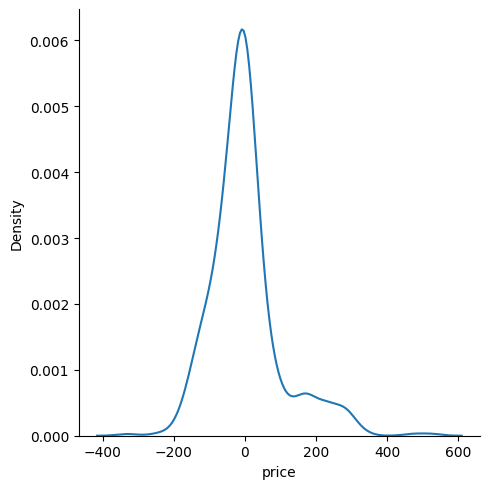

In [150]:
# explore residual
#The residual is the difference between the predicted value and actual value.
#Negative residual means that the predicted value is too high, while positive residual means that the predicted value was too low. 
residual = y_test - y_pred
sns.displot(residual,kind='kde')
plt.show()

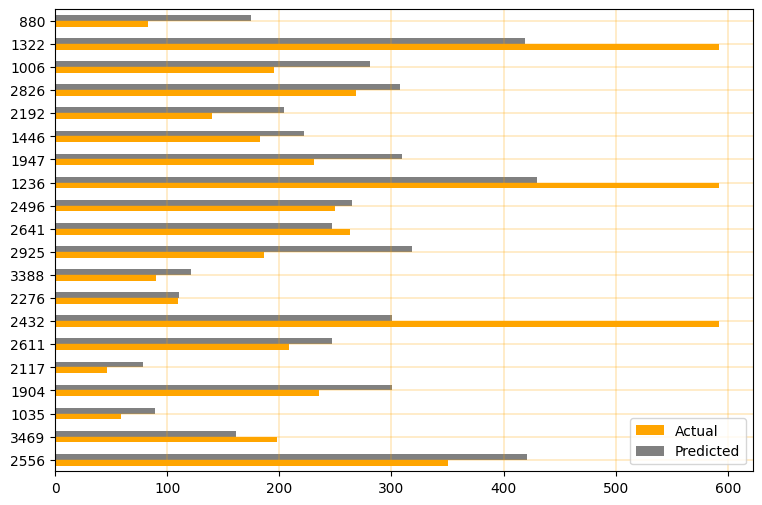

In [151]:
#comparison graph for actual vs predicted price
linmod = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
first20preds3=linmod.head(20)
c2='orange', 'grey'
first20preds3.plot(kind='barh',figsize=(9,6), color=c2)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [152]:
#create coefficients table
coef = lin.coef_
components_coef = pd.DataFrame(zip(X.columns,coef),columns=['component','value'])
components_intercept = pd.DataFrame({'component':'intercept','value':lin.intercept_},index=[0])
components = pd.concat([components_coef,components_intercept])
components

,component,value
0,neighbourhood_cleansed,42.791367
1,property_type,31.163400
2,room_type,32.456632
3,accommodates,9.011390
4,bedrooms,42.463556
5,bathrooms,-0.726593
6,bathroom_type,20.723502
7,short_long_stay,-53.264885
0,intercept,-99.314093
